In [3]:
from data_utils import load_data,flatten_data
from hybrid_model import build_bi_cnn_banet_model
from model_utils import model_pipeline,plot_history
import numpy as np
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
train_participant_num = ["C56D","C93D","C382D","C382N","C544D","C709N","C788N","P113D","P113N","P191D","P191N","P299D","P299N","P300D","P336D","P492D","P492N","P531N","P699D","P699N","P890N","P921D","P921N"]
valid_participant_num = ["C67D","C202D","C202N","C256D","C256N","P54D","P54N","P342D","P342N","P487D","P487N","P649N"]

In [5]:
X_train, y_train = load_data(train_participant_num, 'train', downsampling=True,angle_energy=False,augment=False)
X_valid, y_valid = load_data(valid_participant_num, 'validation')

C56D is not selected to be used for training (downsampling)
C93D is not selected to be used for training (downsampling)
C382D is not selected to be used for training (downsampling)
C382N is not selected to be used for training (downsampling)
C544D is not selected to be used for training (downsampling)
C709N is not selected to be used for training (downsampling)
C788N is not selected to be used for training (downsampling)
P113D is selected to be used for training (downsampling)
P113N is selected to be used for training (downsampling)
P191D is selected to be used for training (downsampling)
P191N is selected to be used for training (downsampling)
P299D is selected to be used for training (downsampling)
P299N is selected to be used for training (downsampling)
P300D is selected to be used for training (downsampling)
P336D is selected to be used for training (downsampling)
P492D is selected to be used for training (downsampling)
P492N is selected to be used for training (downsampling)
P531N

In [6]:
print(X_train.shape,np.unique(y_train[:,0],return_counts=True))

print(X_valid.shape,np.unique(y_valid[:,0],return_counts=True))

(5012, 180, 70) (array([0., 1.], dtype=float32), array([1053, 3959]))
(2869, 180, 70) (array([0., 1.], dtype=float32), array([ 171, 2698]))


/Users/zekunwu/Library/Python/3.9/lib/python/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Epoch 1: LearningRateScheduler setting learning rate to 0.0005000000237487257.
Epoch 1/30
11/11 [==============================] - 42s 3s/step - loss: 0.1451 - binary_accuracy: 0.7648 - val_loss: 0.1598 - val_binary_accuracy: 0.7937 - lr: 5.0000e-04

Epoch 2: LearningRateScheduler setting learning rate to 0.0005000000237487257.
Epoch 2/30
11/11 [==============================] - 33s 3s/step - loss: 0.1266 - binary_accuracy: 0.7947 - val_loss: 0.1174 - val_binary_accuracy: 0.9449 - lr: 5.0000e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.0005000000237487257.
Epoch 3/30
11/11 [==============================] - 33s 3s/step - loss: 0.1217 - binary_accuracy: 0.8045 - val_loss: 0.0962 - val_binary_accuracy: 0.9439 - lr: 5.0000e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0005000000237487257.
Epoch 4/30
11/11 [==============================] - 32s 3s/step - loss: 0.1180 - binary_accuracy: 0.8132 - val_loss: 0.0874 - val_binary_accuracy: 0.9439 - lr: 5.0000e

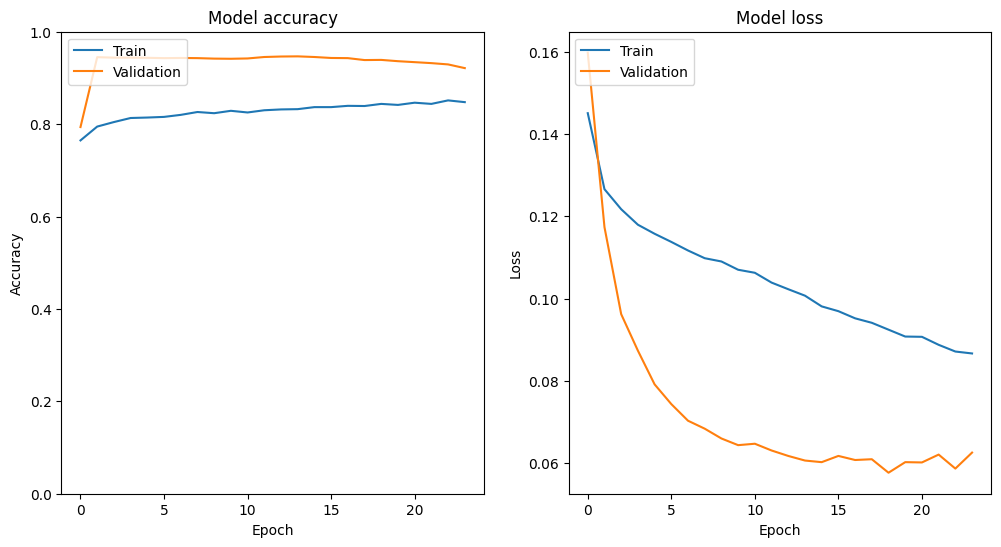

In [8]:
input_shape = (X_train.shape[1], X_train.shape[2])
num_classes = y_train.shape[1]
model = build_bi_cnn_banet_model()
y_pred, y_true, H = model_pipeline(model, X_train, y_train, X_valid, y_valid,epoch=30)
plot_history(H)